## Fonseca and Fleming function 

Problem taken from \[Fonseca, C. M.; Fleming, P. J. (1995). An Overview of Evolutionary Algorithms in Multiobjective Optimization. Evol Comput. 3 (1): 1–16\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i - \frac{1}{\sqrt{3}} \right)^2 \right]$

$f_2 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i + \frac{1}{\sqrt{3}} \right)^2 \right]$

*in the domain*

$-4 \le x_1,x_2,x_3 \le 4$

In [1]:
from mosa import Anneal
from time import time
from math import exp,sqrt
%matplotlib inline

### Translates the Fonseca and Fleming problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. The argument of the Python function is a dictionary with just one key, $X$, representing a temptative solution to the problem. This is a unconstrained problem, so we do not have to worry about how to deal with constraints.

In [2]:
def fobj(solution):
    g1=0.0
    g2=0.0
    Y=1.0/sqrt(3.0)
    
    for i in range(3):
        g1+=pow((solution["X"][i]-Y),2)
        g2+=pow((solution["X"][i]+Y),2)
        
    f1=1.0-exp(-g1)
    f2=1.0-exp(-g2)
    
    return [f1,f2]

### Initialization

First, a population is defined. The population is a dictionary and its key $X$ is the same key that will be present in the temptative solutions to the problem. In the case of the Fonseca and Fleming problem, we used only one key because the varialbes $x_1$, $x_2$ and $x_3$ have the same boundaries. Since the solution space is continuous for $X$ in the domain defined above, $X$ is set to an empty dictionary.

Then, an Anneal object is created with initial definitions. Particularly important, the definitions related to the archive  used to store the best solutions (e.g., archive size) are set by the *setarchiveconfig* function.

In [3]:
population={"X":[]}
opt=Anneal()
opt.setpopulation(population)
opt.setarchiveconfig(archivesize=10000,maxarchivereject=100000)
opt.setalpha(0.0)

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
Developed by Dr. Roberto Gomes de Aguiar Veiga
Universidade Federal do ABC, Brazil


Setting population...
Done!
Setting archive configurations...
Done!
Setting alpha...
Done!


### Hot run

A first run starting at very high temperatures (1) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

Please pay attention to the arguments of *settemp* and *setxconfig* functions. In *setxconfig*, *xnel["X"]* is equal to 3 because any solution of the Fonseca and Fleming problem consists of three numbers. The boundaries are defined by *xbounds["X"]*. 

In [4]:
opt.settemp(initemp=1.0,decrease=0.95,niter=1000,ntemp=100)
opt.setxconfig(xnel={"X":3},
               xstep={"X":1},
               exchangeprob={"X":1.0},
               xbounds={"X":[-4.0,4.0]})
start=time()
opt.evolve(fobj)

Setting temperature...
Done!
Setting solution configurations...
Done!
--- BEGIN: Evolving a solution ---

Initializing archive...
Empty archive!
Done!
Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [-4.0000,4.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 1.000000
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 989.
    Fraction of accepted moves: 0.989000.
    Number of archive updates: 59.
    Fraction of archive updates in accepted moves: 0.059656.
------
TEMPERATU

    Number of accepted moves: 557.
    Fraction of accepted moves: 0.557000.
    Number of archive updates: 24.
    Fraction of archive updates in accepted moves: 0.043088.
------
TEMPERATURE: 0.122087
    Number of accepted moves: 820.
    Fraction of accepted moves: 0.820000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.002439.
------
TEMPERATURE: 0.115982
    Number of accepted moves: 549.
    Fraction of accepted moves: 0.549000.
    Number of archive updates: 11.
    Fraction of archive updates in accepted moves: 0.020036.
------
TEMPERATURE: 0.110183
    Number of accepted moves: 411.
    Fraction of accepted moves: 0.411000.
    Number of archive updates: 20.
    Fraction of archive updates in accepted moves: 0.048662.
------
TEMPERATURE: 0.104674
    Number of accepted moves: 381.
    Fraction of accepted moves: 0.381000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.005249.
------
TEMPERATURE: 0

    Number of accepted moves: 135.
    Fraction of accepted moves: 0.135000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.007407.
------
TEMPERATURE: 0.014160
    Number of accepted moves: 120.
    Fraction of accepted moves: 0.120000.
    Number of archive updates: 5.
    Fraction of archive updates in accepted moves: 0.041667.
------
TEMPERATURE: 0.013452
    Number of accepted moves: 120.
    Fraction of accepted moves: 0.120000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.016667.
------
TEMPERATURE: 0.012779
    Number of accepted moves: 117.
    Fraction of accepted moves: 0.117000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.034188.
------
TEMPERATURE: 0.012140
    Number of accepted moves: 100.
    Fraction of accepted moves: 0.100000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.040000.
------
TEMPERATURE: 0.01

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (0.01) is performed to allow the solutions to relax to the vicinity of the Pareto front. Notice that in the *setxconfig* function the step size was also decreased.

Solutions produced by the "hot run" were taken from the archive.

In [5]:
opt.settemp(initemp=0.01,decrease=0.95,niter=1000,ntemp=100)
opt.setxconfig(xnel={"X":3},
               xstep={"X":0.1},
               exchangeprob={"X":1.0},
               xbounds={"X":[-4.0,4.0]})
opt.evolve(fobj)
end=time()

Setting temperature...
Done!
Setting solution configurations...
Done!
--- BEGIN: Evolving a solution ---

Initializing archive...
Archive loaded from archive.json!
Done!
Looking for a solution in the checkpoint file...
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [-4.0000,4.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.100000
------
Initial solution from the checkpoint file...
Done!
------
TEMPERATURE: 0.010000
    Number of accepted moves: 639.
    Fraction of accepted moves: 0.639000.
    Number of archive updates: 11.
    Fraction of archive updates in accepted moves: 0.017214.
------
TEMPERATURE: 0.00

    Number of accepted moves: 254.
    Fraction of accepted moves: 0.254000.
    Number of archive updates: 9.
    Fraction of archive updates in accepted moves: 0.035433.
------
TEMPERATURE: 0.001424
    Number of accepted moves: 262.
    Fraction of accepted moves: 0.262000.
    Number of archive updates: 11.
    Fraction of archive updates in accepted moves: 0.041985.
------
TEMPERATURE: 0.001353
    Number of accepted moves: 221.
    Fraction of accepted moves: 0.221000.
    Number of archive updates: 16.
    Fraction of archive updates in accepted moves: 0.072398.
------
TEMPERATURE: 0.001285
    Number of accepted moves: 231.
    Fraction of accepted moves: 0.231000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.030303.
------
TEMPERATURE: 0.001221
    Number of accepted moves: 209.
    Fraction of accepted moves: 0.209000.
    Number of archive updates: 12.
    Fraction of archive updates in accepted moves: 0.057416.
------
TEMPERATURE: 0

    Number of accepted moves: 51.
    Fraction of accepted moves: 0.051000.
    Number of archive updates: 14.
    Fraction of archive updates in accepted moves: 0.274510.
------
TEMPERATURE: 0.000157
    Number of accepted moves: 36.
    Fraction of accepted moves: 0.036000.
    Number of archive updates: 20.
    Fraction of archive updates in accepted moves: 0.555556.
------
TEMPERATURE: 0.000149
    Number of accepted moves: 43.
    Fraction of accepted moves: 0.043000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.093023.
------
TEMPERATURE: 0.000142
    Number of accepted moves: 28.
    Fraction of accepted moves: 0.028000.
    No archive update.
------
TEMPERATURE: 0.000135
    Number of accepted moves: 27.
    Fraction of accepted moves: 0.027000.
    No archive update.
------
TEMPERATURE: 0.000128
    Number of accepted moves: 30.
    Fraction of accepted moves: 0.030000.
    Number of archive updates: 3.
    Fraction of archive updates 

#### How long did the optimization process take?

In [6]:
print("   Elapsed time: %f s" % (end-start))

   Elapsed time: 205.245456 s


### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [7]:
purged=opt.purgedominated()
opt.printx(purged)

===
Solutions:
1) {'X': [0.41282995186590354, 0.39508519679314524, 0.4284328280012699]}
2) {'X': [-0.19138026952448883, -0.06927100375543982, -0.19590834479395847]}
3) {'X': [0.13666413571608005, 0.09877892550404699, 0.018933949156121788]}
4) {'X': [0.13666413571608005, 0.09877892550404699, 0.1135525472296881]}
5) {'X': [0.39938505758004594, 0.38615768597642575, 0.49002394547988537]}
6) {'X': [0.10543994427156655, -0.04558564672241072, -0.14026819988250172]}
7) {'X': [0.334168368838347, 0.272812206119742, 0.27587852933942725]}
8) {'X': [0.3813587692439553, 0.3620870821953255, 0.4810774259120212]}
9) {'X': [-0.15268472031526592, 0.022082823856899525, 0.09355413511620991]}
10) {'X': [0.37755272914168936, 0.41387771009742647, 0.33210819170705097]}
11) {'X': [-0.14091712661764766, -0.0423983978338176, -0.17800065501772955]}
12) {'X': [0.5357813610541302, 0.5292886561337697, 0.5966685398163403]}
13) {'X': [-0.3555797656978419, -0.3176923021168834, -0.31407908595254375]}
14) {'X': [-0.053244

7) [0.21554500675743038, 0.8978835902643917]
8) [0.08973486801663422, 0.9461705596622353]
9) [0.658815441587198, 0.6283391674882575]
10) [0.11907784005364341, 0.9342231505904544]
11) [0.7702012793598007, 0.4706616809046118]
12) [0.004401373792063734, 0.9785500271896106]
13) [0.9150851211591728, 0.16965676871743118]
14) [0.7136796157501953, 0.5697919324309435]
15) [0.1610594426523878, 0.9257550820765745]
16) [0.7350145933788717, 0.5274224251702626]
17) [0.6066257934202078, 0.6573751323346654]
18) [0.39643168095807135, 0.8305425462696026]
19) [0.7402346580223937, 0.5097319677244468]
20) [0.0458517715542599, 0.9605822362415705]
21) [0.7573353821264737, 0.489794565328432]
22) [0.515194952250091, 0.749946236616517]
23) [0.5010063454936513, 0.7566920211039387]
24) [0.513066103589061, 0.7503915257470329]
25) [0.8130428924985341, 0.4125353702985197]
26) [0.30549719221979377, 0.8621589892348818]
27) [0.3222253160109181, 0.8555741618883651]
28) [0.4259576815893674, 0.8021911538742268]
29) [0.393

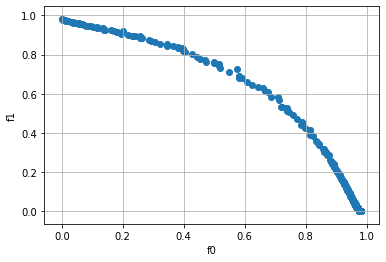

In [8]:
opt.plotfront()